In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
from enmspring.graph_decompose import Bar4PlotHB
from enmspring.graphs import onlyHB
from enmspring.vmddraw import HBWholeMolecule
rootfolder = '/home/yizaochen/codes/dna_rna/fluctmatch_sequence'

### Part 1: Initialize

In [2]:
host = 'a_tract_21mer'
g_agent = onlyHB(host, rootfolder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists


#### Check $\lambda_i=q_i^{T}\textbf{A}q_i + q_i^{T}\textbf{D}q_i$

In [ ]:
sele_id = 1
eigvalue = g_agent.get_eigenvalue_by_id(sele_id)
q = g_agent.get_eigenvector_by_id(sele_id)
A = g_agent.adjacency_mat
D = g_agent.degree_mat
eigvalue_from_decomp = np.dot(q.T, np.dot(A, q)) + np.dot(q.T, np.dot(D, q))
print(f'The {sele_id}-th eigenvalue is: {eigvalue:.3f}')
print(f'The {sele_id}-th eigenvalue from decompose is: {eigvalue_from_decomp:.3f}')

### Part 2: Bar-Plot for 4 hosts

In [2]:
b_agent = Bar4PlotHB(rootfolder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/g_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/g_tract_21mer/bdna+bdna/pd_dfs exists
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/g_tract_21mer/bdna+bdna/pd_dfs exists
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.


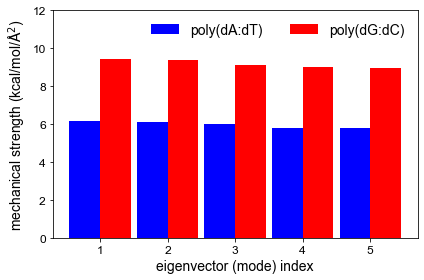

In [4]:
figsize = (6, 4)
small_width = 1
big_width = 1.2
n_modes = 5
ylim = (0, 12)

b_agent.plot_main(figsize, small_width, big_width, n_modes, ylim)
plt.tight_layout()
#plt.savefig('hb_qTAq.png', dpi=300)
plt.show()

### Part 3: Show edges in molecule for a specific mode

In [47]:
host = 'a_tract_21mer'
g_agent = onlyHB(host, rootfolder)
g_agent.pre_process()

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.


In [43]:
eigv_id = 1
df = g_agent.get_df_qTAq_for_vmd_draw(eigv_id)
df.head()

,Strand_i,Resid_i,Atomname_i,Strand_j,Resid_j,Atomname_j,qTAq
0,STRAND1,1,O6,STRAND2,21,N4,0.0
1,STRAND1,1,N1,STRAND2,21,N3,0.0
2,STRAND1,1,N2,STRAND2,21,O2,0.0
3,STRAND1,2,O6,STRAND2,20,N4,0.0
4,STRAND1,2,N1,STRAND2,20,N3,0.0


In [44]:
filter_criteria = 1e-3
mask = df['qTAq'] > filter_criteria
df1 = df[mask]
print(f'There are {df1.shape[0]} bonds left.')

There are 1 bonds left.


### Part 4: Use DataFrame obtained above to draw important bonds on VMD

In [45]:
pic_out_folder = '/home/yizaochen/Desktop/dna_slide_202102'
draw_agent = HBWholeMolecule(host, rootfolder, pic_out_folder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/g_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 231 eigenvectors belonging to STRAND1.
There are 168 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/Desktop/dna_slide_202102/mol_structure exists


In [46]:
radius = 0.5
draw_agent.vmd_show_whole_HB(df1, radius, eigv_id)

vmd -gro /home/yizaochen/codes/dna_rna/all_systems/g_tract_21mer/bdna+bdna/input/allatoms/bdna+bdna.perfect.gro
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/show_backbone_pair.tcl
/home/yizaochen/Desktop/dna_slide_202102/mol_structure/g_tract_21mer_hb_1


### Part : Draw Laplacian Matrix

In [48]:
host = 'a_tract_21mer'
g_agent = onlyHB(host, rootfolder)
g_agent.pre_process()

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.


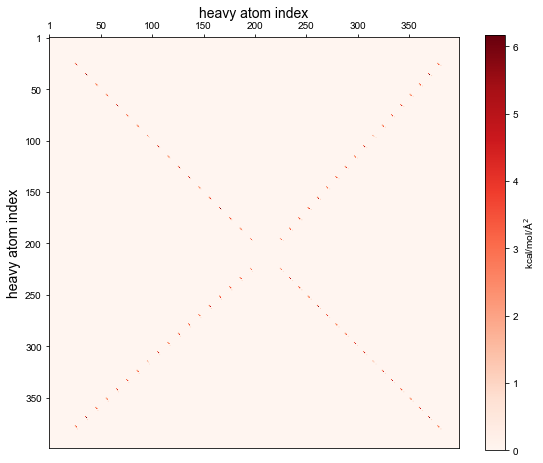

In [58]:
fig, ax = plt.subplots(figsize=(8,8))

ims = ax.imshow(g_agent.laplacian_mat, cmap='Reds')
ticks = [0, 50, 100, 150, 200, 250, 300, 350]
ticklabels = [1,50,100,150,200,250,300,350]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticklabels)
ax.set_yticklabels(ticklabels)
ax.xaxis.tick_top()
ax.set_xlabel('heavy atom index', fontsize=14)
ax.set_ylabel('heavy atom index', fontsize=14)
ax.xaxis.set_label_position('top') 
cb = fig.colorbar(ims, shrink=0.75)
cb.set_label('kcal/mol/Å$^2$')

plt.tight_layout()
plt.savefig('hb_laplacian.png', dpi=300)
plt.show()